### Подключение библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Исключение аномалий

In [2]:
diabetes_df = diabetes_df[diabetes_df['bmi']>0]
diabetes_df = diabetes_df[diabetes_df['glucose']>0]
diabetes_df = diabetes_df[diabetes_df['insulin']>0]

### Разбивка данных на целевую переменную и массив признаков

In [3]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

### Предсказание по одной переменной (BMI)

In [4]:
X_bmi = X[:, 4]
X_bmi = X_bmi.reshape(-1,1)
print(y.shape, X_bmi.shape)

(392,) (392, 1)


### Предсказание по одной переменной (инсулин)

In [5]:
X_in = X[:, 3]
X_in = X_in.reshape(-1,1)
print(y.shape, X_in.shape)

(392,) (392, 1)


### Просмотр данных (глюкоза/BMI)

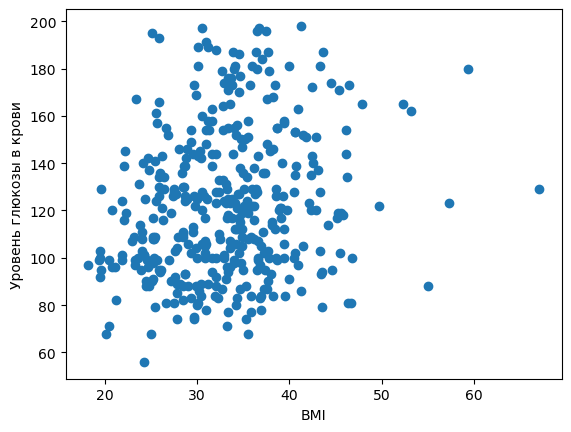

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()

### Создание модели (BMI)

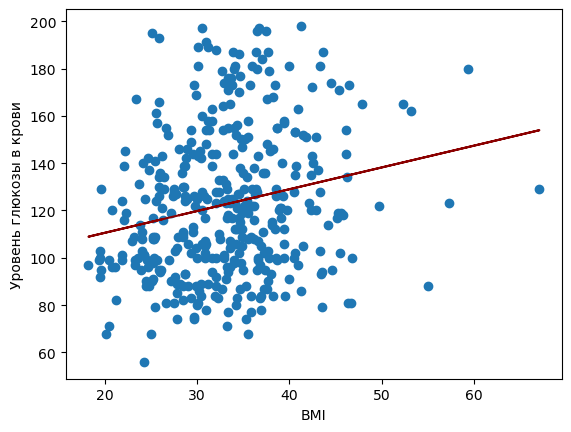

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='darkred')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()

### Просмотр данных (глюкоза/инсулин)

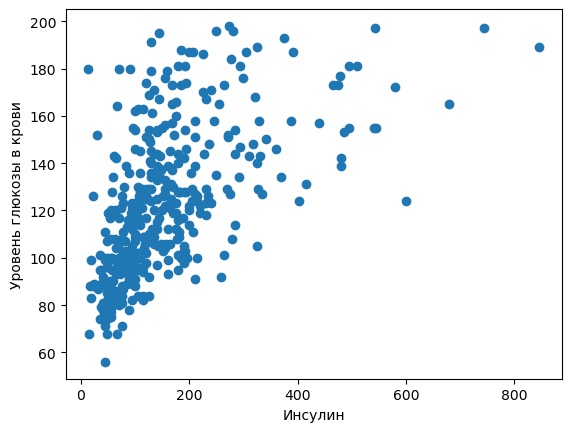

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_in, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('Инсулин')
plt.show()

### Создание модели (инсулин)

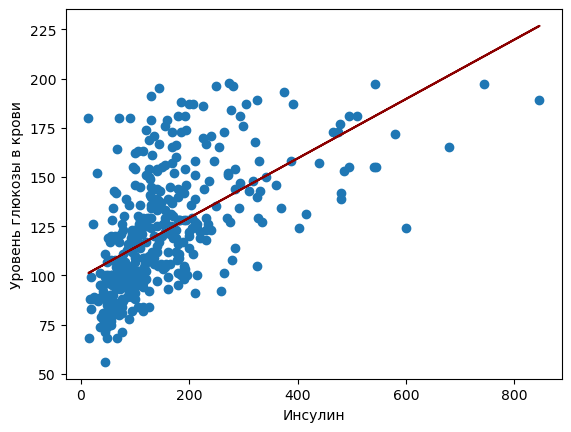

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_in, y)
predictions = reg.predict(X_in)
plt.scatter(X_in, y)
plt.plot(X_in, predictions, color='darkred')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('Инсулин')
plt.show()

### Линейная модель для множества признаков

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train).coef_

array([-0.21225453,  0.1381534 , -0.05680247,  0.10401044, -0.03093424,
       -0.72168597,  0.31602843, 23.23106927])

In [12]:
y_pred = reg_all.predict(X_test)

In [13]:
reg_all.score(X_test, y_test)

0.5094667868757332

### RMSE

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

22.14632133316733

### Кросвалидация

In [16]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 12, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [17]:
cv_results

array([0.59471227, 0.49919026, 0.45133364, 0.45710556, 0.3220995 ,
       0.17991901, 0.41302036, 0.52064279, 0.48913975, 0.50980929,
       0.46960942, 0.46664601])

In [18]:
print(np.mean(cv_results), np.std(cv_results))

0.44776898726615166 0.10197415023368388


In [19]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.21901864 0.57434316]


### Гребневая регерссия

In [20]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1,1,10,100,1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.509576405884622, 0.510493224165769, 0.5148218853400626, 0.49261795851053347, 0.4588698098088013]


### Лассо регрессия

In [21]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01,0.1,1,10,20,50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.5096772969868644, 0.5111484584535526, 0.514524365485503, 0.44260019941345585, 0.4312044757453073, 0.38888803499352564]


### Выбор признаков с помощью лассо регрессии

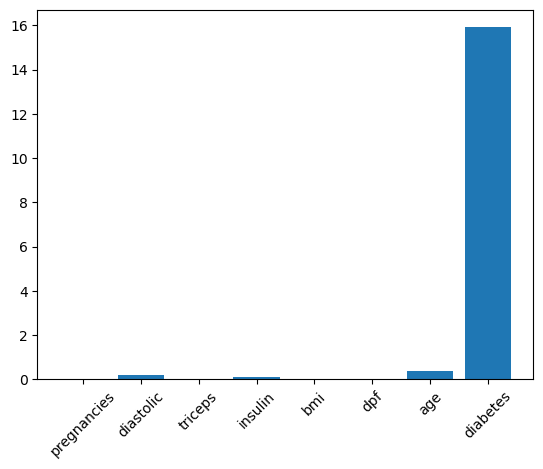

In [23]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']
names = diabetes_df.drop('glucose', axis=1).columns
lasso = Lasso(alpha=1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()